In [26]:
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np


### 载入数据，设置训练集和测试集

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 1, 28, 28])
tensor([[0, 5, 0, 8, 8, 6, 1, 4, 7, 8],
        [8, 7, 6, 8, 1, 0, 8, 7, 1, 5],
        [7, 1, 1, 7, 7, 9, 4, 2, 0, 9],
        [9, 1, 6, 2, 3, 9, 7, 7, 2, 9],
        [9, 6, 9, 4, 1, 9, 5, 2, 4, 8],
        [9, 3, 6, 2, 6, 2, 7, 6, 2, 1],
        [1, 1, 2, 4, 0, 1, 7, 2, 5, 1],
        [2, 0, 2, 0, 0, 3, 8, 3, 5, 7],
        [6, 9, 2, 5, 0, 7, 6, 3, 0, 7],
        [5, 0, 1, 9, 7, 0, 9, 1, 6, 4]])
(302, 302, 3)


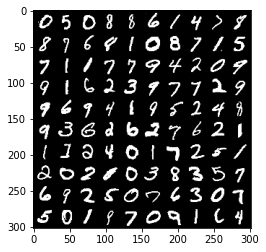

In [27]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
train_dataset = datasets.MNIST(root='../dataset/mnist/',train=True,download=True,transform=transform)
test_dataset = datasets.MNIST(root='../dataset/mnist',train=False,download=True,transform=transform)
batch_size = len(train_dataset)
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=True)
X_train,y_train = next(iter(train_loader))
X_test,y_test = next(iter(train_loader))
#? 打印前100张图片
images, labels= X_train[:100], y_train[:100] 
#? 使用images生成宽度为10张图的网格大小
img = torchvision.utils.make_grid(images, nrow=10)
#? cv2.imshow()的格式是(size1,size1,channels),而img的格式是(channels,size1,size1),
#? 所以需要使用.transpose()转换，将颜色通道数放至第三维
img = img.numpy().transpose(1,2,0)
print(images.shape)
print(labels.reshape(10,10))
print(img.shape)
plt.imshow(img)
plt.show()

### 转换tensor格式为array

In [28]:
X_train,y_train = X_train.cpu().numpy(),y_train.cpu().numpy() #? tensor转为array形式)
X_test,y_test = X_test.cpu().numpy(),y_test.cpu().numpy() #? tensor转为array形式)

### 修改训练集和测试集的形状

In [29]:
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

### 训练模型

In [30]:
model = LogisticRegression(solver='sag', max_iter=400) #? lbfgs：拟牛顿法
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.83      1.00      0.91        10
           2       0.80      0.80      0.80        10
           3       1.00      0.46      0.63        13
           4       0.83      0.50      0.62        10
           5       0.62      0.56      0.59         9
           6       0.78      1.00      0.88        18
           7       0.75      0.82      0.78        11
           8       0.57      0.80      0.67         5
           9       0.42      0.71      0.53         7

    accuracy                           0.74       100
   macro avg       0.76      0.72      0.71       100
weighted avg       0.78      0.74      0.73       100



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [31]:
ones_col=[[1] for i in range(len(X_train))] #? 生成全为1的二维嵌套列表，即[[1],[1],...,[1]]
X_train = np.append(X_train,ones_col,axis=1)
x_train = np.mat(X_train)
X_test = np.append(X_test,ones_col,axis=1)
x_test = np.mat(X_test)
#? Mnsit有0-9十个标记，由于是二分类任务，所以可以将标记0的作为1，其余为0用于识别是否为0的任务
y_train=np.array([1 if y_train[i]==1 else 0 for i in range(len(y_train))])
y_test=np.array([1 if y_test[i]==1 else 0 for i in range(len(y_test))])

In [32]:
model = LogisticRegression(solver='sag', max_iter=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       0.91      1.00      0.95        10

    accuracy                           0.99       100
   macro avg       0.95      0.99      0.97       100
weighted avg       0.99      0.99      0.99       100



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
